In [18]:
from qiskit.providers.aer import QasmSimulator
from qiskit import Aer
from qiskit_machine_learning.algorithms import QSVC
from qiskit.circuit import QuantumCircuit
from qiskit_machine_learning.kernels import QuantumKernel

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## 0-5000 data points

In [20]:
data = pd.read_csv('bank_cleaned.csv').iloc[0:5000]
data.drop(data.columns[[0]], axis=1, inplace=True)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40.0,4.0,1.0,2.0,0.0,3036.0,1.0,0.0,0.0,4.0,8.0,261.0,0.0,0.0,0.0,0.0,0
1,26.0,9.0,2.0,1.0,0.0,945.0,1.0,0.0,0.0,4.0,8.0,151.0,0.0,0.0,0.0,0.0,0
2,15.0,2.0,1.0,1.0,0.0,918.0,1.0,1.0,0.0,4.0,8.0,76.0,0.0,0.0,0.0,0.0,0
3,29.0,1.0,1.0,3.0,0.0,2420.0,1.0,0.0,0.0,4.0,8.0,92.0,0.0,0.0,0.0,0.0,0
4,15.0,11.0,2.0,3.0,0.0,917.0,0.0,0.0,0.0,4.0,8.0,198.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3.0,8.0,2.0,1.0,0.0,1148.0,1.0,0.0,0.0,20.0,8.0,110.0,1.0,0.0,0.0,0.0,0
4996,13.0,4.0,2.0,2.0,0.0,1301.0,1.0,0.0,0.0,20.0,8.0,304.0,0.0,0.0,0.0,0.0,0
4997,16.0,1.0,1.0,1.0,0.0,5291.0,1.0,0.0,0.0,20.0,8.0,51.0,1.0,0.0,0.0,0.0,0
4998,17.0,4.0,2.0,2.0,0.0,987.0,1.0,0.0,0.0,20.0,8.0,836.0,11.0,0.0,0.0,0.0,0


In [21]:
encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(data)
encoded_data = pd.DataFrame(encoded_data)

In [22]:
x = encoded_data.drop(16, axis = 1)
y = encoded_data[16]

In [23]:
y = encoder.fit_transform(np.array(y).reshape(-1, 1))
y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, shuffle = True)

In [25]:
# Normalisation
std_scale = StandardScaler().fit(x_train)
x_train = std_scale.transform(x_train)
x_test = std_scale.transform(x_test)

In [26]:
samples = np.append(x_train, x_test, axis=0)
minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
x_train = minmax_scale.transform(x_train)
x_test = minmax_scale.transform(x_test)

In [27]:
classifier=QSVC(quantum_kernel=zz_kernel_full).fit(x_train, y_train)
print('success')
y_pred = classifier.predict(x_test)
prediction = y_pred
accuracy_score = accuracy_score(y_test, y_pred)

NameError: name 'zz_kernel_full' is not defined

In [180]:
confusion_matrix = confusion_matrix(y_test,  y_pred)

In [181]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

In [182]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Precision: ',precision)
print('Recall: ',recall)
print('Accuracy: ',accuracy_score)

Precision:  0.0
Recall:  0.0
Accuracy:  0.9693333333333334


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


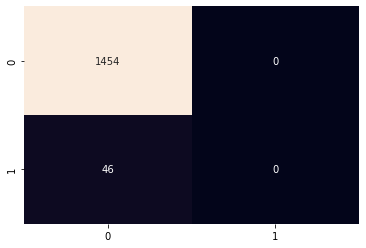

In [183]:
sns.heatmap(confusion_matrix, annot = True, cbar = False, fmt = 'd')
plt.show()

## 5k-10k data points

In [347]:
data = pd.read_csv('C:/Users/Administrator/Desktop/bank_cleaned.csv').iloc[5000:10000]
data.drop(data.columns[[0]], axis=1, inplace=True)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
5000,14.0,4.0,2.0,2.0,0.0,1644.0,1.0,0.0,0.0,20.0,8.0,125.0,0.0,0.0,0.0,0.0,0
5001,20.0,7.0,1.0,2.0,0.0,795.0,1.0,0.0,0.0,20.0,8.0,288.0,0.0,0.0,0.0,0.0,0
5002,11.0,4.0,2.0,2.0,0.0,1246.0,1.0,0.0,0.0,20.0,8.0,315.0,0.0,0.0,0.0,0.0,0
5003,13.0,4.0,2.0,2.0,0.0,1741.0,1.0,0.0,0.0,20.0,8.0,506.0,1.0,0.0,0.0,0.0,1
5004,18.0,4.0,2.0,2.0,0.0,1163.0,0.0,0.0,0.0,20.0,8.0,354.0,4.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,31.0,3.0,1.0,0.0,0.0,4111.0,0.0,0.0,0.0,8.0,6.0,119.0,2.0,0.0,0.0,0.0,0
9996,34.0,2.0,1.0,2.0,0.0,2031.0,1.0,0.0,0.0,8.0,6.0,124.0,1.0,0.0,0.0,0.0,0
9997,22.0,1.0,1.0,0.0,0.0,964.0,0.0,0.0,0.0,8.0,6.0,100.0,4.0,0.0,0.0,0.0,0
9998,28.0,7.0,1.0,2.0,0.0,1390.0,0.0,0.0,0.0,8.0,6.0,445.0,1.0,0.0,0.0,0.0,0


In [348]:
encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(data)
encoded_data = pd.DataFrame(encoded_data)

In [349]:
x = encoded_data.drop(16, axis = 1)
y = encoded_data[16]

In [350]:
y = encoder.fit_transform(np.array(y).reshape(-1, 1)) 
y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [351]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, shuffle = True)

In [352]:
# Normalisation
std_scale = StandardScaler().fit(x_train)
x_train = std_scale.transform(x_train)
x_test = std_scale.transform(x_test)

In [353]:
samples = np.append(x_train, x_test, axis=0)
minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
x_train = minmax_scale.transform(x_train)
x_test = minmax_scale.transform(x_test)

In [354]:
classifier=QSVC(quantum_kernel = zz_kernel_full).fit(x_train, y_train)
print('success')
y_pred = classifier.predict(x_test)
prediction = y_pred


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


success


In [355]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)

print('Precision: ',precision)
print('Recall: ',recall)
print('Accuracy: ',accuracy)

Precision:  0.0
Recall:  0.0
Accuracy:  0.9553333333333334


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


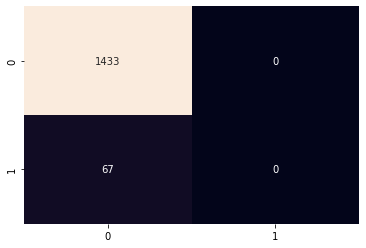

In [356]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion, annot = True, cbar = False, fmt = 'd')
plt.show()

## 10k-15k data points

In [357]:
data = pd.read_csv('C:/Users/Administrator/Desktop/bank_cleaned.csv').iloc[10000:15000]
data.drop(data.columns[[0]], axis=1, inplace=True)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
10000,20.0,0.0,1.0,0.0,0.0,2403.0,0.0,0.0,0.0,8.0,6.0,332.0,1.0,0.0,0.0,0.0,0
10001,21.0,1.0,1.0,1.0,0.0,1054.0,0.0,0.0,0.0,8.0,6.0,61.0,1.0,0.0,0.0,0.0,0
10002,17.0,7.0,1.0,1.0,0.0,439.0,1.0,0.0,0.0,8.0,6.0,90.0,1.0,0.0,0.0,0.0,0
10003,20.0,0.0,1.0,1.0,0.0,1188.0,1.0,1.0,0.0,8.0,6.0,174.0,1.0,0.0,0.0,0.0,0
10004,22.0,4.0,1.0,1.0,0.0,853.0,0.0,0.0,0.0,8.0,6.0,248.0,3.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,19.0,1.0,1.0,1.0,0.0,890.0,0.0,0.0,1.0,16.0,5.0,209.0,1.0,0.0,0.0,0.0,0
14996,21.0,6.0,1.0,1.0,0.0,1083.0,1.0,1.0,0.0,16.0,5.0,330.0,0.0,0.0,0.0,0.0,0
14997,33.0,1.0,1.0,0.0,0.0,916.0,0.0,1.0,1.0,16.0,5.0,299.0,8.0,0.0,0.0,0.0,0
14998,9.0,4.0,1.0,2.0,0.0,5090.0,0.0,1.0,0.0,16.0,5.0,159.0,2.0,0.0,0.0,0.0,0


In [358]:
encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(data)
encoded_data = pd.DataFrame(encoded_data)

In [359]:
x = encoded_data.drop(16, axis = 1)
y = encoded_data[16]

In [360]:
y = encoder.fit_transform(np.array(y).reshape(-1, 1)) 
y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [361]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, shuffle = True)

In [362]:
# Normalisation
std_scale = StandardScaler().fit(x_train)
x_train = std_scale.transform(x_train)
x_test = std_scale.transform(x_test)

In [363]:
samples = np.append(x_train, x_test, axis=0)
minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
x_train = minmax_scale.transform(x_train)
x_test = minmax_scale.transform(x_test)

In [364]:
classifier=QSVC(quantum_kernel = zz_kernel_full).fit(x_train, y_train)
print('success')
y_pred = classifier.predict(x_test)
prediction = y_pred


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


success


In [365]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)

print('Precision: ',precision)
print('Recall: ',recall)
print('Accuracy: ',accuracy)

Precision:  0.0
Recall:  0.0
Accuracy:  0.952


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


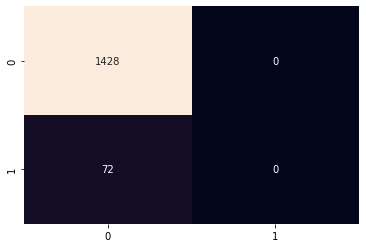

In [366]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion, annot = True, cbar = False, fmt = 'd')
plt.show()

## 15k-20k data points

In [367]:
data = pd.read_csv('C:/Users/Administrator/Desktop/bank_cleaned.csv').iloc[15000:20000]
data.drop(data.columns[[0]], axis=1, inplace=True)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
15000,19.0,9.0,1.0,1.0,0.0,2058.0,1.0,0.0,0.0,16.0,5.0,309.0,1.0,0.0,0.0,0.0,0
15001,31.0,4.0,1.0,2.0,0.0,994.0,0.0,1.0,0.0,16.0,5.0,257.0,1.0,0.0,0.0,0.0,0
15002,19.0,7.0,2.0,1.0,0.0,959.0,1.0,0.0,0.0,16.0,5.0,36.0,1.0,0.0,0.0,0.0,0
15003,34.0,9.0,1.0,1.0,0.0,1188.0,0.0,1.0,0.0,16.0,5.0,53.0,0.0,0.0,0.0,0.0,0
15004,24.0,1.0,1.0,0.0,0.0,916.0,1.0,0.0,0.0,16.0,5.0,71.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,14.0,0.0,2.0,2.0,0.0,1214.0,0.0,0.0,0.0,7.0,1.0,494.0,0.0,0.0,0.0,0.0,0
19996,37.0,4.0,1.0,2.0,0.0,1139.0,0.0,0.0,0.0,7.0,1.0,273.0,4.0,0.0,0.0,0.0,0
19997,37.0,4.0,1.0,2.0,0.0,2813.0,0.0,0.0,0.0,7.0,1.0,167.0,0.0,0.0,0.0,0.0,0
19998,21.0,2.0,1.0,2.0,0.0,1661.0,0.0,0.0,0.0,7.0,1.0,88.0,0.0,0.0,0.0,0.0,0


In [368]:
encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(data)
encoded_data = pd.DataFrame(encoded_data)

In [369]:
x = encoded_data.drop(16, axis = 1)
y = encoded_data[16]

In [370]:
y = encoder.fit_transform(np.array(y).reshape(-1, 1)) 
y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [371]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, shuffle = True)

In [372]:
# Normalisation
std_scale = StandardScaler().fit(x_train)
x_train = std_scale.transform(x_train)
x_test = std_scale.transform(x_test)

In [373]:
samples = np.append(x_train, x_test, axis=0)
minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
x_train = minmax_scale.transform(x_train)
x_test = minmax_scale.transform(x_test)

In [374]:
classifier=QSVC(quantum_kernel = zz_kernel_full).fit(x_train, y_train)
print('success')
y_pred = classifier.predict(x_test)
prediction = y_pred

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


success


In [375]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)

print('Precision: ',precision)
print('Recall: ',recall)
print('Accuracy: ',accuracy)

Precision:  0.4090909090909091
Recall:  0.08823529411764706
Accuracy:  0.9293333333333333


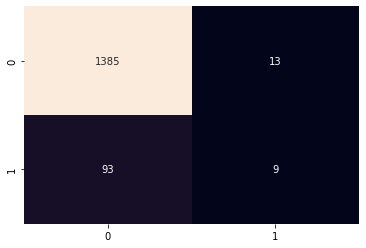

In [376]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion, annot = True, cbar = False, fmt = 'd')
plt.show()

## 20k-25k data points

In [377]:
data = pd.read_csv('C:/Users/Administrator/Desktop/bank_cleaned.csv').iloc[20000:25000]
data.drop(data.columns[[0]], axis=1, inplace=True)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
20000,17.0,3.0,1.0,0.0,0.0,993.0,0.0,0.0,0.0,7.0,1.0,191.0,0.0,0.0,0.0,0.0,0
20001,22.0,4.0,1.0,2.0,0.0,2384.0,0.0,0.0,0.0,7.0,1.0,63.0,1.0,0.0,0.0,0.0,0
20002,22.0,9.0,1.0,1.0,0.0,6331.0,0.0,0.0,0.0,7.0,1.0,204.0,0.0,0.0,0.0,0.0,0
20003,15.0,9.0,2.0,2.0,0.0,5623.0,0.0,0.0,0.0,7.0,1.0,127.0,2.0,0.0,0.0,0.0,0
20004,14.0,4.0,1.0,2.0,0.0,916.0,0.0,0.0,0.0,7.0,1.0,83.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,16.0,2.0,2.0,2.0,1.0,2619.0,0.0,1.0,0.0,17.0,9.0,288.0,0.0,0.0,0.0,0.0,0
24996,34.0,9.0,1.0,1.0,0.0,3473.0,1.0,0.0,0.0,17.0,9.0,77.0,1.0,0.0,0.0,0.0,0
24997,16.0,9.0,2.0,1.0,0.0,6978.0,1.0,0.0,0.0,17.0,9.0,535.0,0.0,0.0,0.0,0.0,0
24998,36.0,4.0,0.0,2.0,0.0,3064.0,1.0,1.0,1.0,17.0,9.0,1030.0,0.0,0.0,0.0,0.0,1


In [378]:
encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(data)
encoded_data = pd.DataFrame(encoded_data)

In [379]:
x = encoded_data.drop(16, axis = 1)
y = encoded_data[16]

In [380]:
y = encoder.fit_transform(np.array(y).reshape(-1, 1)) 
y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]])

In [381]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, shuffle = True)

In [382]:
# Normalisation
std_scale = StandardScaler().fit(x_train)
x_train = std_scale.transform(x_train)
x_test = std_scale.transform(x_test)

In [383]:
samples = np.append(x_train, x_test, axis=0)
minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
x_train = minmax_scale.transform(x_train)
x_test = minmax_scale.transform(x_test)

In [384]:
classifier=QSVC(quantum_kernel = zz_kernel_full).fit(x_train, y_train)
print('success')
y_pred = classifier.predict(x_test)
prediction = y_pred

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


success


In [385]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)

print('Precision: ',precision)
print('Recall: ',recall)
print('Accuracy: ',accuracy)

Precision:  1.0
Recall:  0.011904761904761904
Accuracy:  0.9446666666666667


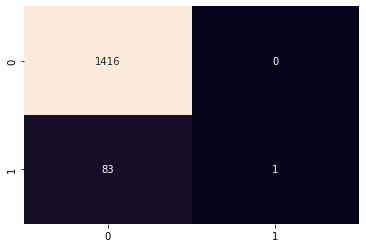

In [386]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion, annot = True, cbar = False, fmt = 'd')
plt.show()

## 25k-30k data points

In [387]:
data = pd.read_csv('C:/Users/Administrator/Desktop/bank_cleaned.csv').iloc[25000:30000]
data.drop(data.columns[[0]], axis=1, inplace=True)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
25000,18.0,4.0,1.0,2.0,0.0,1787.0,0.0,0.0,0.0,17.0,9.0,170.0,0.0,0.0,0.0,0.0,0
25001,37.0,4.0,1.0,2.0,0.0,5148.0,0.0,0.0,0.0,17.0,9.0,530.0,0.0,0.0,0.0,0.0,0
25002,35.0,2.0,1.0,3.0,0.0,6998.0,0.0,0.0,0.0,17.0,9.0,52.0,0.0,162.0,1.0,0.0,0
25003,28.0,4.0,1.0,1.0,0.0,1346.0,1.0,0.0,0.0,17.0,9.0,91.0,0.0,0.0,0.0,0.0,0
25004,27.0,1.0,1.0,0.0,0.0,1063.0,1.0,0.0,0.0,17.0,9.0,226.0,0.0,165.0,2.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,9.0,0.0,2.0,1.0,0.0,1214.0,0.0,0.0,0.0,3.0,3.0,207.0,2.0,0.0,0.0,0.0,0
29996,21.0,7.0,0.0,1.0,0.0,1145.0,1.0,0.0,0.0,3.0,3.0,238.0,0.0,0.0,0.0,0.0,0
29997,30.0,4.0,2.0,1.0,0.0,923.0,0.0,0.0,0.0,3.0,3.0,191.0,0.0,0.0,0.0,0.0,0
29998,22.0,0.0,1.0,1.0,0.0,2058.0,1.0,0.0,0.0,3.0,3.0,126.0,0.0,0.0,0.0,0.0,0


In [388]:
encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(data)
encoded_data = pd.DataFrame(encoded_data)

In [389]:
x = encoded_data.drop(16, axis = 1)
y = encoded_data[16]

In [390]:
y = encoder.fit_transform(np.array(y).reshape(-1, 1)) 
y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [391]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, shuffle = True)

In [392]:
# Normalisation
std_scale = StandardScaler().fit(x_train)
x_train = std_scale.transform(x_train)
x_test = std_scale.transform(x_test)

In [393]:
samples = np.append(x_train, x_test, axis=0)
minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
x_train = minmax_scale.transform(x_train)
x_test = minmax_scale.transform(x_test)

In [394]:
classifier=QSVC(quantum_kernel = zz_kernel_full).fit(x_train, y_train)
print('success')
y_pred = classifier.predict(x_test)
prediction = y_pred

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


success


In [395]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)

print('Precision: ',precision)
print('Recall: ',recall)
print('Accuracy: ',accuracy)

Precision:  0.0
Recall:  0.0
Accuracy:  0.9433333333333334


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


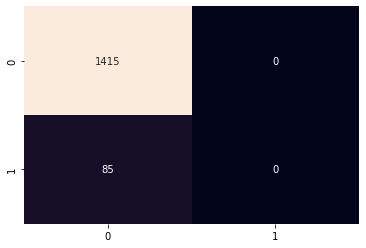

In [396]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion, annot = True, cbar = False, fmt = 'd')
plt.show()

## 30k-35k data points

In [397]:
data = pd.read_csv('C:/Users/Administrator/Desktop/bank_cleaned.csv').iloc[30000:35000]
data.drop(data.columns[[0]], axis=1, inplace=True)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
30000,22.0,7.0,2.0,1.0,0.0,4628.0,0.0,0.0,0.0,3.0,3.0,671.0,1.0,0.0,0.0,0.0,0
30001,20.0,10.0,1.0,2.0,0.0,1117.0,0.0,0.0,0.0,3.0,3.0,209.0,0.0,0.0,0.0,0.0,0
30002,14.0,4.0,1.0,2.0,0.0,3681.0,1.0,1.0,0.0,3.0,3.0,419.0,0.0,0.0,0.0,0.0,0
30003,21.0,10.0,1.0,1.0,0.0,2225.0,1.0,0.0,0.0,3.0,3.0,587.0,1.0,0.0,0.0,0.0,0
30004,28.0,1.0,2.0,1.0,0.0,1290.0,0.0,1.0,0.0,3.0,3.0,23.0,4.0,7.0,2.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,11.0,0.0,2.0,1.0,0.0,1221.0,1.0,0.0,0.0,5.0,8.0,138.0,1.0,0.0,0.0,0.0,0
34996,8.0,1.0,2.0,1.0,0.0,1107.0,1.0,0.0,0.0,5.0,8.0,550.0,0.0,0.0,0.0,0.0,1
34997,11.0,7.0,2.0,1.0,0.0,995.0,1.0,0.0,0.0,5.0,8.0,811.0,0.0,331.0,3.0,1.0,0
34998,36.0,1.0,1.0,0.0,0.0,1078.0,1.0,0.0,0.0,5.0,8.0,184.0,0.0,0.0,0.0,0.0,0


In [398]:
encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(data)
encoded_data = pd.DataFrame(encoded_data)

In [399]:
x = encoded_data.drop(16, axis = 1)
y = encoded_data[16]

In [400]:
y = encoder.fit_transform(np.array(y).reshape(-1, 1)) 
y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [401]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, shuffle = True)

In [402]:
# Normalisation
std_scale = StandardScaler().fit(x_train)
x_train = std_scale.transform(x_train)
x_test = std_scale.transform(x_test)

In [403]:
samples = np.append(x_train, x_test, axis=0)
minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
x_train = minmax_scale.transform(x_train)
x_test = minmax_scale.transform(x_test)

In [404]:
classifier=QSVC(quantum_kernel = zz_kernel_full).fit(x_train, y_train)
print('success')
y_pred = classifier.predict(x_test)
prediction = y_pred

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


success


In [405]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)

print('Precision: ',precision)
print('Recall: ',recall)
print('Accuracy: ',accuracy)

Precision:  0.6666666666666666
Recall:  0.11494252873563218
Accuracy:  0.836


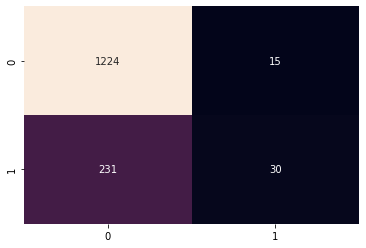

In [406]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion, annot = True, cbar = False, fmt = 'd')
plt.show()

## 35k-40k data points

In [407]:
data = pd.read_csv('C:/Users/Administrator/Desktop/bank_cleaned.csv').iloc[35000:40000]
data.drop(data.columns[[0]], axis=1, inplace=True)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
35000,14.0,9.0,0.0,1.0,0.0,4085.0,1.0,0.0,0.0,5.0,8.0,118.0,0.0,257.0,3.0,0.0,0
35001,20.0,3.0,0.0,0.0,0.0,916.0,1.0,1.0,0.0,5.0,8.0,79.0,1.0,163.0,7.0,0.0,0
35002,8.0,1.0,2.0,0.0,0.0,622.0,1.0,0.0,0.0,5.0,8.0,138.0,0.0,0.0,0.0,0.0,0
35003,31.0,7.0,2.0,1.0,0.0,5865.0,1.0,0.0,0.0,5.0,8.0,482.0,1.0,0.0,0.0,0.0,0
35004,16.0,6.0,1.0,0.0,0.0,1168.0,1.0,1.0,0.0,5.0,8.0,654.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,35.0,9.0,1.0,2.0,0.0,1311.0,0.0,0.0,0.0,2.0,6.0,107.0,0.0,0.0,0.0,0.0,0
39996,12.0,4.0,2.0,2.0,0.0,4081.0,0.0,0.0,0.0,2.0,6.0,238.0,2.0,0.0,0.0,0.0,1
39997,36.0,0.0,0.0,1.0,0.0,1116.0,0.0,0.0,0.0,2.0,6.0,170.0,0.0,0.0,0.0,0.0,1
39998,16.0,4.0,1.0,2.0,0.0,1963.0,0.0,0.0,0.0,2.0,6.0,342.0,0.0,87.0,7.0,1.0,0


In [408]:
encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(data)
encoded_data = pd.DataFrame(encoded_data)

In [409]:
x = encoded_data.drop(16, axis = 1)
y = encoded_data[16]

In [410]:
y = encoder.fit_transform(np.array(y).reshape(-1, 1)) 
y

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]])

In [411]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, shuffle = True)

In [412]:
# Normalisation
std_scale = StandardScaler().fit(x_train)
x_train = std_scale.transform(x_train)
x_test = std_scale.transform(x_test)

In [413]:
samples = np.append(x_train, x_test, axis=0)
minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
x_train = minmax_scale.transform(x_train)
x_test = minmax_scale.transform(x_test)

In [414]:
classifier=QSVC(quantum_kernel = zz_kernel_full).fit(x_train, y_train)
print('success')
y_pred = classifier.predict(x_test)
prediction = y_pred

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


success


In [415]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)

print('Precision: ',precision)
print('Recall: ',recall)
print('Accuracy: ',accuracy)

Precision:  0.3333333333333333
Recall:  0.013333333333333334
Accuracy:  0.8986666666666666


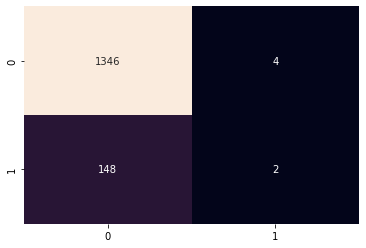

In [416]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion, annot = True, cbar = False, fmt = 'd')
plt.show()

## 40k-45k data points

In [417]:
data = pd.read_csv('C:/Users/Administrator/Desktop/bank_cleaned.csv').iloc[40000:45000]
data.drop(data.columns[[0]], axis=1, inplace=True)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
40000,39.0,5.0,1.0,1.0,0.0,1634.0,0.0,0.0,0.0,2.0,6.0,170.0,0.0,0.0,0.0,0.0,0
40001,32.0,4.0,1.0,1.0,0.0,1184.0,0.0,0.0,0.0,2.0,6.0,74.0,1.0,87.0,2.0,0.0,0
40002,28.0,9.0,2.0,1.0,0.0,4770.0,1.0,0.0,0.0,2.0,6.0,65.0,0.0,93.0,1.0,0.0,0
40003,38.0,0.0,1.0,1.0,0.0,4241.0,0.0,0.0,0.0,2.0,6.0,151.0,0.0,0.0,0.0,0.0,0
40004,14.0,7.0,2.0,2.0,0.0,1701.0,0.0,0.0,0.0,2.0,6.0,273.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,7.0,0.0,2.0,2.0,0.0,3731.0,0.0,0.0,0.0,11.0,10.0,143.0,0.0,0.0,0.0,0.0,0
44996,57.0,5.0,0.0,1.0,0.0,2008.0,0.0,0.0,1.0,11.0,10.0,250.0,0.0,421.0,2.0,0.0,0
44997,15.0,6.0,2.0,2.0,0.0,1574.0,1.0,0.0,0.0,11.0,10.0,146.0,1.0,180.0,3.0,0.0,0
44998,15.0,4.0,2.0,2.0,0.0,1047.0,1.0,0.0,0.0,11.0,10.0,209.0,2.0,418.0,2.0,0.0,1


In [418]:
encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(data)
encoded_data = pd.DataFrame(encoded_data)

In [419]:
x = encoded_data.drop(16, axis = 1)
y = encoded_data[16]

In [420]:
y = encoder.fit_transform(np.array(y).reshape(-1, 1)) 
y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]])

In [421]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, shuffle = True)

In [422]:
# Normalisation
std_scale = StandardScaler().fit(x_train)
x_train = std_scale.transform(x_train)
x_test = std_scale.transform(x_test)

In [423]:
samples = np.append(x_train, x_test, axis=0)
minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
x_train = minmax_scale.transform(x_train)
x_test = minmax_scale.transform(x_test)

In [424]:
classifier=QSVC(quantum_kernel = zz_kernel_full).fit(x_train, y_train)
print('success')
y_pred = classifier.predict(x_test)
prediction = y_pred

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


success


In [425]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)

print('Precision: ',precision)
print('Recall: ',recall)
print('Accuracy: ',accuracy)

Precision:  0.6836555360281195
Recall:  0.5471167369901547
Accuracy:  0.6653333333333333


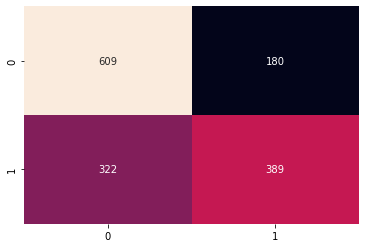

In [426]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion, annot = True, cbar = False, fmt = 'd')
plt.show()

## 45k-50k data points

In [498]:
data = pd.read_csv('C:/Users/Administrator/Desktop/bank_cleaned.csv').iloc[45000:50000]
data.drop(data.columns[[0]], axis=1, inplace=True)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45000,20.000000,1.000000,2.000000,1.000000,0.0,916.000000,0.000000,0.000000,0.0,11.000000,10.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0
45001,7.000000,4.000000,2.000000,2.000000,0.0,2563.000000,1.000000,0.000000,0.0,11.000000,10.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0
45002,18.000000,4.000000,2.000000,2.000000,0.0,3497.000000,0.000000,0.000000,0.0,12.000000,10.000000,169.000000,0.000000,179.000000,10.000000,2.000000,1
45003,44.000000,6.000000,0.000000,2.000000,0.0,922.000000,1.000000,0.000000,0.0,12.000000,10.000000,216.000000,0.000000,180.000000,4.000000,2.000000,1
45004,11.000000,6.000000,2.000000,2.000000,0.0,2492.000000,0.000000,0.000000,0.0,12.000000,10.000000,190.000000,0.000000,89.000000,5.000000,2.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,7.642782,0.714435,2.000000,2.000000,0.0,1671.713389,1.000000,0.000000,0.0,4.964697,5.749738,453.499477,1.000000,271.748692,4.464174,1.821391,1
49996,20.940228,2.059772,0.646743,1.353257,0.0,2702.402283,0.646743,0.000000,0.0,12.059772,6.940228,543.750167,1.413029,0.000000,0.000000,0.000000,1
49997,41.058095,5.000000,0.000000,0.994190,0.0,1429.814095,0.000000,0.000000,0.0,1.994190,3.011619,260.994191,0.005810,0.000000,0.000000,0.000000,1
49998,13.041515,4.000000,2.000000,2.000000,0.0,953.166060,0.000000,0.000000,0.0,7.539694,1.000000,669.705754,1.124545,0.000000,0.000000,0.000000,1


In [499]:
encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(data)
encoded_data = pd.DataFrame(encoded_data)

In [500]:
x = encoded_data.drop(16, axis = 1)
y = encoded_data[16]

In [501]:
y = encoder.fit_transform(np.array(y).reshape(-1, 1)) 
y

array([[0.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [502]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, shuffle = True)

In [503]:
# Normalisation
std_scale = StandardScaler().fit(x_train)
x_train = std_scale.transform(x_train)
x_test = std_scale.transform(x_test)

In [504]:
samples = np.append(x_train, x_test, axis=0)
minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
x_train = minmax_scale.transform(x_train)
x_test = minmax_scale.transform(x_test)

In [505]:
classifier=QSVC(quantum_kernel = zz_kernel_full).fit(x_train, y_train)
print('success')
y_pred = classifier.predict(x_test)
prediction = y_pred

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


success


In [506]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)

print('Precision: ',precision)
print('Recall: ',recall)
print('Accuracy: ',accuracy)

Precision:  0.9746666666666667
Recall:  1.0
Accuracy:  0.9746666666666667


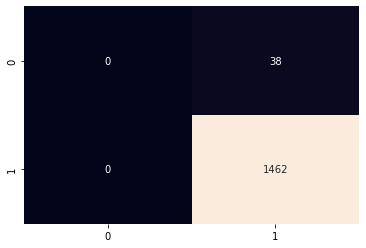

In [507]:
confusion=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion, annot = True, cbar = False, fmt = 'd')
plt.show()

# Zero classification in target beyond 50k index of rows

## 50k-55k data points

In [508]:
data = pd.read_csv('C:/Users/Administrator/Desktop/bank_cleaned.csv').iloc[50000:55000]
data.drop(data.columns[[0]], axis=1, inplace=True)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
50000,19.455417,9.000000,2.000000,1.193073,0.0,6943.529130,0.193073,0.000000,0.000000,19.000000,9.000000,1414.207815,2.806927,0.0,0.0,0.0,1
50001,15.487481,3.546244,1.151252,1.848748,0.0,1235.974962,0.000000,0.000000,0.000000,11.058763,4.453756,261.605008,0.848748,0.0,0.0,0.0,1
50002,15.100477,6.224881,1.550238,1.775119,0.0,1372.153098,0.224881,0.000000,0.000000,19.100477,2.124404,1484.679409,1.550238,0.0,0.0,0.0,1
50003,22.224496,6.612248,1.564625,1.564625,0.0,1238.727881,0.000000,0.000000,0.000000,19.530620,2.741499,867.755116,0.564625,0.0,0.0,0.0,1
50004,27.344003,0.384001,0.000000,0.192000,0.0,1339.527990,0.904000,0.096000,0.904000,22.576001,10.000000,73.375988,0.000000,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54995,30.946065,2.760516,1.000000,1.000000,0.0,1435.173677,0.706581,0.293419,0.000000,13.347355,7.413161,913.946065,0.000000,0.0,0.0,0.0,1
54996,20.604415,0.739558,1.000000,0.260442,0.0,1503.801015,1.000000,0.260442,0.000000,18.437351,8.000000,648.218675,1.260442,0.0,0.0,0.0,1
54997,29.530308,6.823231,0.310967,1.000000,0.0,4550.525231,0.689033,0.000000,0.310967,20.420637,3.310967,361.658022,0.310967,0.0,0.0,0.0,1
54998,22.834893,4.204917,1.000000,1.000000,0.0,1501.125297,1.000000,0.685012,0.000000,19.220142,3.740047,1385.899288,15.755273,0.0,0.0,0.0,1


In [509]:
encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(data)
encoded_data = pd.DataFrame(encoded_data)

In [510]:
x = encoded_data.drop(16, axis = 1)
y = encoded_data[16]

In [511]:
y = encoder.fit_transform(np.array(y).reshape(-1, 1)) 
y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [512]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, shuffle = True)

In [513]:
# Normalisation
std_scale = StandardScaler().fit(x_train)
x_train = std_scale.transform(x_train)
x_test = std_scale.transform(x_test)

In [514]:
samples = np.append(x_train, x_test, axis=0)
minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
x_train = minmax_scale.transform(x_train)
x_test = minmax_scale.transform(x_test)

In [515]:
classifier=QSVC(quantum_kernel = zz_kernel_full).fit(x_train, y_train)
print('success')
y_pred = classifier.predict(x_test)
prediction = y_pred

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


ValueError: The number of classes has to be greater than one; got 1 class

In [516]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)
confusion=confusion_matrix(y_test, y_pred)

print('Precision: ',precision)
print('Recall: ',recall)
print('Accuracy: ',accuracy)

Precision:  0.0
Recall:  0.0
Accuracy:  0.0


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 55k-60k data points

In [518]:
data = pd.read_csv('C:/Users/Administrator/Desktop/bank_cleaned.csv').iloc[55000:60000]
data.drop(data.columns[[0]], axis=1, inplace=True)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
55000,14.581999,3.581999,2.000000,1.895500,0.000000,4238.014495,0.000000,0.000000,0.000000,11.477499,3.731502,155.805494,0.895500,73.430977,2.686499,0.000000,1
55001,30.586255,4.000000,0.712638,2.000000,0.000000,916.000000,0.000000,0.000000,0.000000,6.310425,5.275830,306.149447,9.413745,0.000000,0.000000,0.000000,1
55002,8.463131,10.000000,2.000000,0.146313,0.000000,1044.707374,0.146313,0.000000,0.146313,11.292626,1.316818,173.951617,1.707374,0.000000,0.000000,0.000000,1
55003,39.971499,2.980999,1.000000,0.504750,0.000000,1112.495250,0.000000,0.000000,0.000000,18.019001,1.990500,96.847992,0.000000,0.000000,0.000000,0.000000,1
55004,38.500224,2.499776,0.375056,1.624944,0.000000,3244.873039,0.375056,0.000000,0.000000,4.000000,3.625392,1023.626289,0.624944,37.496638,1.249888,1.249888,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,37.997808,0.646930,1.000000,1.000000,0.000000,1104.826753,0.000000,0.000000,0.000000,9.469299,2.940790,181.940790,0.000000,87.706140,3.646930,1.353070,1
59996,16.840438,6.304263,1.231912,1.231912,0.000000,916.463825,0.000000,0.000000,0.000000,23.897927,4.072350,843.159562,0.768088,0.000000,0.000000,0.000000,1
59997,25.283545,1.858228,1.143038,0.286076,0.856962,480.855697,0.856962,0.856962,0.000000,20.287341,0.572152,691.143038,0.143038,0.000000,0.000000,0.000000,1
59998,46.556042,5.362931,1.120977,1.000000,0.000000,3255.975579,0.000000,0.000000,0.000000,25.975579,9.153162,199.629305,1.604884,0.000000,0.000000,0.000000,1


In [519]:
encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(data)
encoded_data = pd.DataFrame(encoded_data)

In [520]:
x = encoded_data.drop(16, axis = 1)
y = encoded_data[16]

In [521]:
y = encoder.fit_transform(np.array(y).reshape(-1, 1)) 
y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [522]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, shuffle = True)

In [523]:
# Normalisation
std_scale = StandardScaler().fit(x_train)
x_train = std_scale.transform(x_train)
x_test = std_scale.transform(x_test)

In [524]:
samples = np.append(x_train, x_test, axis=0)
minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
x_train = minmax_scale.transform(x_train)
x_test = minmax_scale.transform(x_test)

In [525]:
classifier=QSVC(quantum_kernel = zz_kernel_full).fit(x_train, y_train)
print('success')
y_pred = classifier.predict(x_test)
prediction = y_pred

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


ValueError: The number of classes has to be greater than one; got 1 class

In [526]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)

print('Precision: ',precision)
print('Recall: ',recall)
print('Accuracy: ',accuracy)

Precision:  0.0
Recall:  0.0
Accuracy:  0.0


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [527]:
sns.heatmap(confusion_matrix, annot = True, cbar = False, fmt = 'd')
plt.show()

ValueError: Must pass 2-d input. shape=()

## 60k-65k data points

In [528]:
data = pd.read_csv('C:/Users/Administrator/Desktop/bank_cleaned.csv').iloc[60000:65000]
data.drop(data.columns[[0]], axis=1, inplace=True)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
60000,16.155010,8.892685,1.011924,1.988076,0.0,4373.582664,0.988076,0.000000,0.000000,16.928457,7.952304,722.429259,3.000000,0.000000,0.000000,0.000000,1
60001,27.239532,4.114620,2.000000,1.588538,0.0,1304.650994,0.411462,0.000000,0.588538,18.770761,5.645848,972.994853,1.000000,0.000000,0.000000,0.000000,1
60002,23.261533,6.962638,1.000000,2.962638,0.0,2451.383528,0.018681,0.018681,0.000000,27.775828,5.074724,710.952729,0.981319,0.000000,0.000000,0.000000,1
60003,27.450856,7.605651,0.302825,1.000000,0.0,1573.323117,1.000000,0.000000,0.000000,3.422603,3.000000,524.943493,0.605651,197.429367,2.514127,2.000000,1
60004,13.999013,6.250863,1.500247,1.000000,0.0,952.005921,0.249877,0.000000,0.249877,17.499753,0.750123,161.249877,0.000000,171.999013,1.999507,0.499753,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64995,19.917846,9.000000,1.520539,1.479461,0.0,6697.301004,0.479461,0.000000,0.000000,10.958923,5.205386,252.876084,0.479461,207.767686,5.356230,1.041077,1
64996,20.226318,5.002836,1.111741,1.000000,0.0,1148.008507,1.000000,0.000000,0.000000,18.994329,2.332388,1463.220647,2.111741,0.000000,0.000000,0.000000,1
64997,9.332717,2.184637,2.000000,1.000000,0.0,940.519203,1.000000,0.851920,0.000000,12.963442,6.815363,897.592319,0.000000,0.000000,0.000000,0.000000,1
64998,17.127871,7.120215,1.624043,1.375957,0.0,2193.872129,0.624043,0.000000,0.000000,18.744258,6.503828,163.473204,0.624043,132.186838,5.744258,1.375957,1


In [529]:
encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(data)
encoded_data = pd.DataFrame(encoded_data)

In [530]:
x = encoded_data.drop(16, axis = 1)
y = encoded_data[16]

In [531]:
y = encoder.fit_transform(np.array(y).reshape(-1, 1)) 
y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [532]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, shuffle = True)

In [533]:
# Normalisation
std_scale = StandardScaler().fit(x_train)
x_train = std_scale.transform(x_train)
x_test = std_scale.transform(x_test)

In [534]:
samples = np.append(x_train, x_test, axis=0)
minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
x_train = minmax_scale.transform(x_train)
x_test = minmax_scale.transform(x_test)

In [535]:
classifier=QSVC(quantum_kernel = zz_kernel_full).fit(x_train, y_train)
print('success')
y_pred = classifier.predict(x_test)
prediction = y_pred

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


ValueError: The number of classes has to be greater than one; got 1 class

In [536]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)

print('Precision: ',precision)
print('Recall: ',recall)
print('Accuracy: ',accuracy)

Precision:  0.0
Recall:  0.0
Accuracy:  0.0


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 65k-70k data points

In [538]:
data = pd.read_csv('C:/Users/Administrator/Desktop/bank_cleaned.csv').iloc[65000:70000]
data.drop(data.columns[[0]], axis=1, inplace=True)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
65000,17.475505,7.422191,1.315562,2.000000,0.0,1120.422191,0.315562,0.0,0.0,9.840056,2.208933,342.110954,1.000000,0.000000,0.000000,0.000000,1
65001,25.361300,1.120433,1.959856,0.080289,0.0,917.605777,0.000000,0.0,0.0,8.401444,5.160578,1213.722600,0.080289,0.000000,0.000000,0.000000,1
65002,35.301359,5.167992,0.194665,1.610669,0.0,5769.509107,1.000000,0.0,0.0,7.087972,9.637343,723.381379,0.000000,162.759939,3.610669,0.389331,1
65003,9.395144,9.000000,2.000000,1.000000,0.0,2902.604856,0.232524,0.0,0.0,25.907284,3.069904,140.186899,0.000000,0.000000,0.000000,0.000000,1
65004,22.555750,2.288037,1.144018,1.572009,0.0,2665.921017,0.000000,0.0,0.0,14.131824,7.139954,258.020324,1.855982,425.995935,2.283972,1.144018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,25.375827,4.525024,1.474976,1.474976,0.0,1441.374882,0.000000,0.0,0.0,12.474976,1.000000,196.274787,1.050047,0.000000,0.000000,0.000000,1
69996,11.271233,4.000000,1.728767,2.000000,0.0,1791.220548,1.000000,0.0,0.0,13.508220,10.457534,146.575344,0.135616,100.406849,1.000000,1.728767,1
69997,25.150606,0.393826,1.212349,0.606174,0.0,955.760532,0.393826,0.0,0.0,13.606174,8.000000,835.030872,0.000000,0.000000,0.000000,0.000000,1
69998,18.699495,1.488777,2.000000,2.000000,0.0,1231.793632,0.372194,0.0,0.0,28.255612,4.094136,620.717592,0.372194,84.605359,5.721942,2.000000,1


In [539]:
encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(data)
encoded_data = pd.DataFrame(encoded_data)

In [540]:
x = encoded_data.drop(16, axis = 1)
y = encoded_data[16]

In [541]:
y = encoder.fit_transform(np.array(y).reshape(-1, 1)) 
y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [542]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, shuffle = True)

In [543]:
# Normalisation
std_scale = StandardScaler().fit(x_train)
x_train = std_scale.transform(x_train)
x_test = std_scale.transform(x_test)

In [544]:
samples = np.append(x_train, x_test, axis=0)
minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
x_train = minmax_scale.transform(x_train)
x_test = minmax_scale.transform(x_test)

In [545]:
classifier=QSVC(quantum_kernel = zz_kernel_full).fit(x_train, y_train)
print('success')
y_pred = classifier.predict(x_test)
prediction = y_pred

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


ValueError: The number of classes has to be greater than one; got 1 class

In [546]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)

print('Precision: ',precision)
print('Recall: ',recall)
print('Accuracy: ',accuracy)

Precision:  0.0
Recall:  0.0
Accuracy:  0.0


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 70k-75k data points

In [548]:
data = pd.read_csv('C:/Users/Administrator/Desktop/bank_cleaned.csv').iloc[70000:75000]
data.drop(data.columns[[0]], axis=1, inplace=True)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
70000,5.788892,7.225398,1.887301,1.000000,0.0,1344.380967,1.000000,0.000000,0.0,4.028580,6.338097,766.873011,0.000000,0.000000,0.000000,0.000000,1
70001,20.117468,1.882532,1.000000,2.705823,0.0,1538.176710,1.000000,0.000000,0.0,18.411645,1.470887,1280.589372,5.176710,0.000000,0.000000,0.000000,1
70002,15.474817,10.876899,1.000000,1.017586,0.0,1250.648284,0.000000,0.000000,0.0,2.947243,3.140686,888.138296,0.982414,174.105515,6.929657,0.035172,1
70003,10.053494,6.935422,2.000000,1.688193,0.0,3271.708436,0.000000,0.000000,0.0,22.570120,0.935422,112.333975,0.623615,0.000000,0.000000,0.000000,1
70004,25.000000,2.589247,1.630108,1.000000,0.0,673.068818,1.000000,0.630108,0.0,10.617205,3.739785,748.780645,2.849462,45.997848,2.520430,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,18.113926,2.763111,1.608198,0.195901,0.0,1522.298371,0.804099,0.000000,0.0,9.154913,8.195901,544.918024,1.608198,0.000000,0.000000,0.000000,1
74996,51.376019,4.904472,1.000000,0.000000,0.0,3454.853661,0.000000,0.000000,0.0,5.522359,1.477641,214.292679,0.095528,0.000000,0.000000,0.000000,1
74997,15.140361,7.401917,1.532694,1.532694,0.0,2495.738444,0.467306,0.000000,0.0,9.663472,7.271139,137.298195,0.467306,91.271139,3.000000,0.934611,1
74998,37.733698,1.946740,1.221304,0.610652,0.0,2617.016526,0.610652,0.000000,0.0,17.831956,9.610652,438.291090,0.389348,0.000000,0.000000,0.000000,1


In [549]:
encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(data)
encoded_data = pd.DataFrame(encoded_data)

In [550]:
x = encoded_data.drop(16, axis = 1)
y = encoded_data[16]

In [551]:
y = encoder.fit_transform(np.array(y).reshape(-1, 1)) 
y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [552]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, shuffle = True)

In [553]:
# Normalisation
std_scale = StandardScaler().fit(x_train)
x_train = std_scale.transform(x_train)
x_test = std_scale.transform(x_test)

In [554]:
samples = np.append(x_train, x_test, axis=0)
minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
x_train = minmax_scale.transform(x_train)
x_test = minmax_scale.transform(x_test)

In [555]:
classifier=QSVC(quantum_kernel = zz_kernel_full).fit(x_train, y_train)
print('success')
y_pred = classifier.predict(x_test)
prediction = y_pred

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


ValueError: The number of classes has to be greater than one; got 1 class

In [556]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)

print('Precision: ',precision)
print('Recall: ',recall)
print('Accuracy: ',accuracy)

Precision:  0.0
Recall:  0.0
Accuracy:  0.0


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [557]:
sns.heatmap(confusion_matrix, annot = True, cbar = False, fmt = 'd')
plt.show()

ValueError: Must pass 2-d input. shape=()

## 75k-79.9k data points

In [558]:
data = pd.read_csv('C:/Users/Administrator/Desktop/bank_cleaned.csv').iloc[75000::]
data.drop(data.columns[[0]], axis=1, inplace=True)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
75000,35.682045,2.854364,0.768205,0.463591,0.0,916.000000,0.768205,0.000000,0.000000,17.781546,4.768205,1191.595886,0.231795,0.000000,0.000000,0.000000,1
75001,39.193184,5.000000,1.000000,0.579552,0.0,6413.022601,0.000000,0.000000,0.000000,11.931839,3.386368,961.613453,0.579552,70.193004,4.840897,1.613632,1
75002,14.636863,4.359572,1.880143,1.880143,0.0,1901.839002,1.000000,0.000000,0.000000,24.239715,9.280856,308.554581,0.000000,90.760285,2.000000,2.000000,1
75003,60.658547,4.342204,1.000000,1.868441,0.0,5013.104196,0.000000,0.000000,0.868441,6.605322,6.210645,667.025110,0.131559,0.000000,0.000000,0.000000,1
75004,12.770870,7.000000,1.959428,1.918856,0.0,2697.541739,0.040572,0.000000,0.000000,3.365149,1.000000,286.904554,0.000000,177.918856,1.959428,0.081144,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79839,16.953906,1.000000,0.046094,2.907811,0.0,1080.829698,0.000000,0.000000,0.000000,9.769528,5.769528,963.663264,1.000000,0.000000,0.000000,0.000000,1
79840,0.462676,7.629859,2.000000,2.907465,0.0,1264.185070,0.046268,0.046268,0.000000,4.601479,8.000000,442.444789,2.861197,0.000000,0.000000,0.000000,1
79841,20.285328,1.000000,1.000000,1.000000,0.0,1083.389821,0.935030,0.935030,0.000000,11.389821,7.805090,610.440717,0.389821,0.000000,0.000000,0.000000,1
79842,22.664764,2.600571,1.000000,1.067047,0.0,1776.661910,0.533524,0.533524,0.000000,13.002854,4.734665,973.726103,0.533524,0.000000,0.000000,0.000000,1


In [559]:
encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(data)
encoded_data = pd.DataFrame(encoded_data)

In [560]:
x = encoded_data.drop(16, axis = 1)
y = encoded_data[16]

In [561]:
y = encoder.fit_transform(np.array(y).reshape(-1, 1)) 
y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [562]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, shuffle = True)

In [563]:
# Normalisation
std_scale = StandardScaler().fit(x_train)
x_train = std_scale.transform(x_train)
x_test = std_scale.transform(x_test)

In [564]:
samples = np.append(x_train, x_test, axis=0)
minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
x_train = minmax_scale.transform(x_train)
x_test = minmax_scale.transform(x_test)

In [565]:
classifier=QSVC(quantum_kernel = zz_kernel_full).fit(x_train, y_train)
print('success')
y_pred = classifier.predict(x_test)
prediction = y_pred

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


ValueError: The number of classes has to be greater than one; got 1 class

In [566]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)

print('Precision: ',precision)
print('Recall: ',recall)
print('Accuracy: ',accuracy)

ValueError: Found input variables with inconsistent numbers of samples: [1454, 1500]

In [567]:
sns.heatmap(confusion_matrix, annot = True, cbar = False, fmt = 'd')
plt.show()

ValueError: Must pass 2-d input. shape=()